# CS 4661
# Kevin Tong
## Homework 4
## 304708110

In [1]:
# Importing our libraries and such
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
import pandas as pd


In [2]:
heart_df = pd.read_csv('/Users/kevin/Classes/CS4661/src/homework-4/heart_short.csv')

In [3]:
heart_df[0::20] 

,Age,RestBP,Chol,RestECG,MaxHR,Oldpeak,AHD
0,63,145,233,2,150,2.3,No
20,64,110,211,2,144,1.8,No
40,40,140,199,0,178,1.4,No
60,39,140,321,2,182,0.0,No
80,57,128,303,2,159,0.0,No
100,51,100,222,0,143,1.2,No
120,52,128,205,0,184,0.0,No
140,54,110,214,0,158,1.6,No
160,42,148,244,2,178,0.8,No
180,57,150,126,0,173,0.2,No


In [4]:
feature_cols = [
    'Age',
    'RestBP',
    'Chol',
    'RestECG', 
    'MaxHR', 
    'Oldpeak'
]

x = heart_df[feature_cols]
y = heart_df['AHD'].map(
    {
        'Yes': 1,
        'No': 0
    }
)

preprocessing.scale(x)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.


array([[ 0.94788279,  0.74978425, -0.25859799,  1.04743633, -0.00919313,
         1.13182982],
       [ 1.38542704,  1.59842565,  0.75330422,  1.04743633, -1.84813139,
         0.43550978],
       [ 1.38542704, -0.6646181 , -0.33496796,  1.04743633, -0.92866226,
         1.39294984],
       ...,
       [ 0.29156641, -0.09885716, -2.20603242, -0.96851989, -1.54164168,
         0.17438976],
       [ 0.29156641, -0.09885716, -0.2013205 ,  1.04743633,  1.04162873,
        -0.8700903 ],
       [-1.78676878,  0.35375159, -1.36596267, -0.96851989,  0.99784448,
        -0.8700903 ]])

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=3)

In [6]:
logreg = LogisticRegression(solver='liblinear', multi_class='auto')

In [7]:
# Training on training set
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [8]:
# Testing on testing set
y_predict = logreg.predict(x_test)

In [9]:
logreg_score = accuracy_score(y_test, y_predict)
print(logreg_score)

0.7183098591549296


In [10]:
# Predict probability
logreg_probability = logreg.predict_proba(x_test)


In [11]:
from sklearn import metrics

# fpr, tpr, thresholds = metrics.roc_curve(y_test, logreg_probability[:,1], pos_label=1)

fpr, tpr, thresholds = metrics.roc_curve(y_test, logreg_probability[:,1], pos_label=1)

print(fpr)
print(tpr)


[0.         0.         0.02439024 0.02439024 0.07317073 0.07317073
 0.12195122 0.12195122 0.17073171 0.17073171 0.2195122  0.2195122
 0.24390244 0.24390244 0.31707317 0.31707317 0.41463415 0.41463415
 0.48780488 0.48780488 0.53658537 0.53658537 0.68292683 0.68292683
 0.70731707 0.70731707 0.75609756 0.75609756 1.        ]
[0.         0.03333333 0.03333333 0.36666667 0.36666667 0.4
 0.4        0.56666667 0.56666667 0.6        0.6        0.63333333
 0.63333333 0.7        0.7        0.73333333 0.73333333 0.8
 0.8        0.83333333 0.83333333 0.86666667 0.86666667 0.9
 0.9        0.96666667 0.96666667 1.         1.        ]


In [12]:
# AUC:
AUC = metrics.auc(fpr, tpr)
print(AUC)


0.7723577235772358


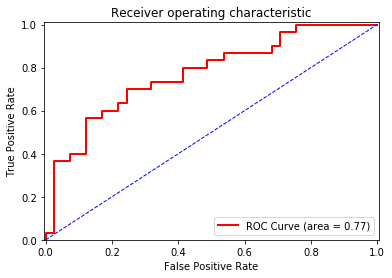

In [13]:
# Importing the "pyplot" package of "matplotlib" library of python to generate 
# graphs and plot curves:
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()
